In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# 1.Task: Image Transformation and Manipulation
## Objective:
Create a program that allows users to perform basic transformations on images, including converting
color spaces, rotating images, and scaling images.
Implementation Steps:
1. Load the image using a suitable library like OpenCV .
2. Implement functions for color space conversions (e.g., RGB to Grayscale, RGB to HSV) based
on the user's selection.
3. Implement functions for rotating and scaling image
4. Display the original and transformed image

Saving rose.jpg to rose (4).jpg
Choose a tranformation (color, rotate, scale): color
Enter the color space (grayscale, hsv): hsv


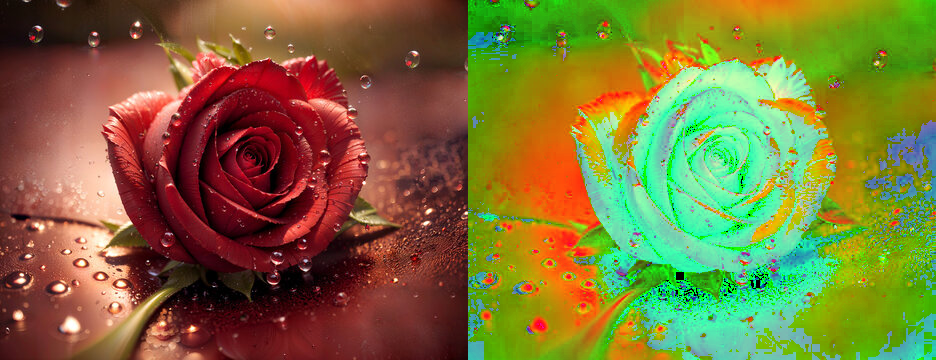

In [7]:
# Load Image
def LoadImage(image_path):
  img = cv2.imread(image_path)
  return img

# Colour space
def ColorSpace(img, color):
  if color == 'gray':
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  elif color == 'hsv':
    return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  else:
    return img

# Rotate imge
def RotateImage(img, angle):
  height, width = img.shape[:2]
  rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1.0)
  return cv2.wrapAffine(img, rotation_matrix, (width, height))

# Scale Image
def ScaleImage(img, scale):
  height, width = img.shape[:2]
  new_height = int(height * scale)
  new_width = int(width * scale)
  return cv2.resize(img,(new_height, new_width), interplotation=cv2.INTER_AREA)

# Display the image
def display(original_img, transformed_img):
  concate = np.concatenate((original_img, transformed_img),axis=1)
  cv2_imshow(concate)

# upload images
upload = files.upload()
# Get file file
file_path = next(iter(upload))

# Load Image
img = LoadImage(file_path)

# Choose any transformation you want
choose = input("Choose a tranformation (color, rotate, scale): ")


# Use if else for choosing
if choose == 'color':
  color = input("Enter the color space (grayscale, hsv): ")
  transformed_img = ColorSpace(img, color)
elif choose == 'rotate':
  angle = float(input("Enter the angle in degrees:"))
  transformed_img = RotateImage(img, angle)
elif choose == 'scale':
  scale = float(input('Enter the scaling factor:'))
  transformed_img = ScaleImage(img, scale)
else:
  print("Invalide choice....... Please enter the right choice.....")

# Display original and trnasformed image
display(img, transformed_img)




# 2. Task: Image Operations and Adjustment
# Objective
Create a program that performs different operations on two images, including addition,
subtraction, bitwise operations, contrast adjustment, and brightness adjustment.
Implementation Steps:
1. Load the images using a suitable library like OpenCV .
2. Implement functions for addition, subtraction, and bitwise operations using the image
arrays.( any 1 bitwise operation )
3. Implement functions for adjusting the contrast and brightness using image processing
techniques.
4. Display the original and processed images  

Saving AT3_1m4_01.tif to AT3_1m4_01.tif


Saving AT3_1m4_10.tif to AT3_1m4_10.tif
Choose an operation (add, subtract, bitwise_and, contrast, brightness): add


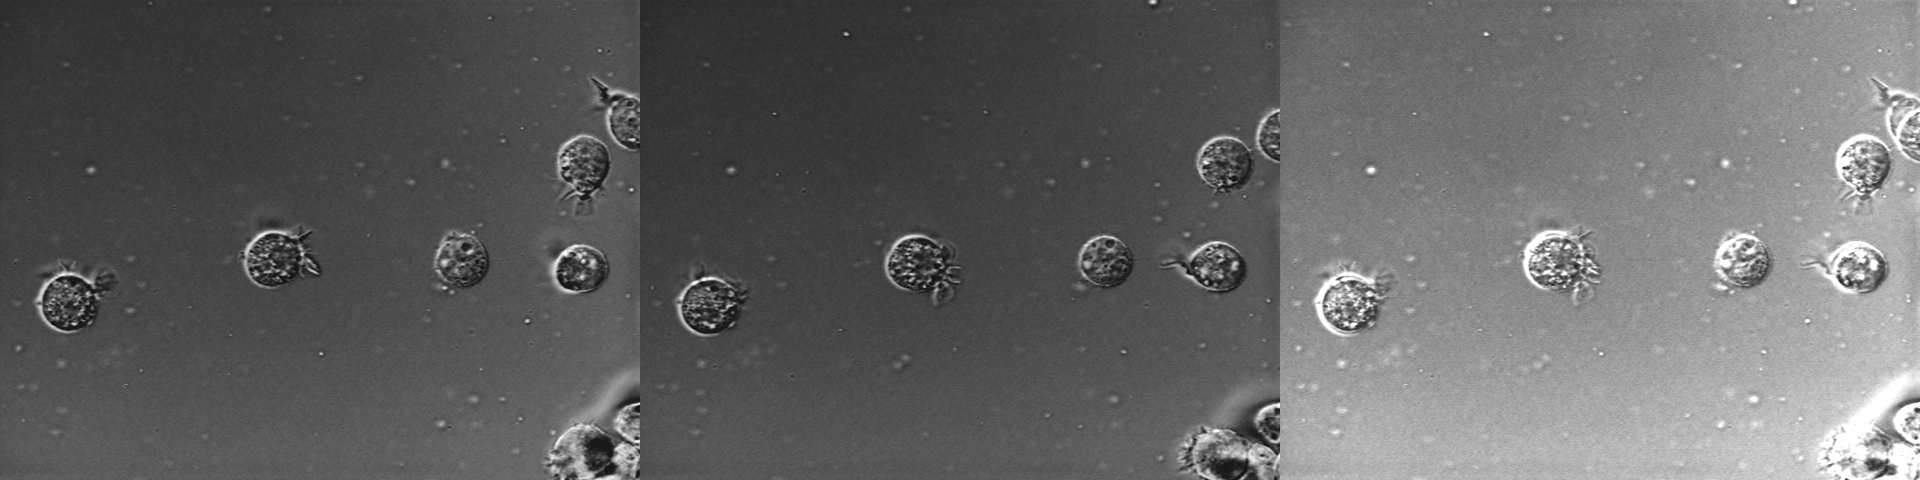

In [ ]:
# Load images
def load_images(img_path1, img_path2):
    img1 = cv2.imread(img_path1)
    img2 = cv2.imread(img_path2)
    return img1, img2

# Add images
def add(img1, img2):
    return cv2.add(img1, img2)

# Subtract images
def subtract(img1, img2):
    return cv2.subtract(img1, img2)

# Bitwise AND operation
def bitwise_and(img1, img2):
    return cv2.bitwise_and(img1, img2)

# Adjust contrast
def adjust_contrast(img, alpha, beta):
    adjusted = cv2.addWeighted(img, alpha, np.zeros(img.shape, img.dtype), 0, beta)
    return adjusted

# Adjust brightness
def adjust_brightness(img, beta):
    adjusted = cv2.add(img, np.ones(img.shape, dtype=np.uint8) * beta)
    return adjusted

# Display images
def display_images(img1, img2, processed_img):
    show = np.concatenate((img1, img2, processed_img), axis=1)
    cv2_imshow(show)

# Get the file paths of the uploaded images
file_path1 = next(iter(files.upload()))
file_path2 = next(iter(files.upload()))

# Load the images
img1, img2 = load_images(file_path1, file_path2)

# Choose operation
operation_choice = input("Choose an operation (add, subtract, bitwise_and, contrast, brightness): ")

if operation_choice == "add":
    processed_img = add(img1, img2)
elif operation_choice == "subtract":
    processed_img = subtract(img1, img2)
elif operation_choice == "bitwise_and":
    processed_img = bitwise_and(img1, img2)
elif operation_choice == "contrast":
    alpha = float(input("Enter the contrast alpha value (1.0-3.0): "))
    beta = int(input("Enter the contrast beta value (0-100): "))
    processed_img = adjust_contrast(img1, alpha, beta)
elif operation_choice == "brightness":
    beta = int(input("Enter the brightness beta value (0-100): "))
    processed_img = adjust_brightness(img1, beta)
else:
    print("Invalid operation choice.")

# Display original and processed images
display_images(img1, img2, processed_img)


# 3. Morphological Operations in Image Processing
Objective
Create a program that demonstrates the application of basic morphological operations,
including erosion, dilation, opening, and closing, on images.
Implementation Steps:
1. Load the image using a suitable library like OpenCV  
2. Implement functions for erosion, dilation, opening, and closing operations based on the
user's specified structuring element.
3. Display the original and processed image

Saving 206237791-anime-manga-girl-with-headphones-and-a-microphone-in-front-of-a-computer-monitor.jpg to 206237791-anime-manga-girl-with-headphones-and-a-microphone-in-front-of-a-computer-monitor.jpg
Enter the operation (erosion, dilation, opening, closing): dilation


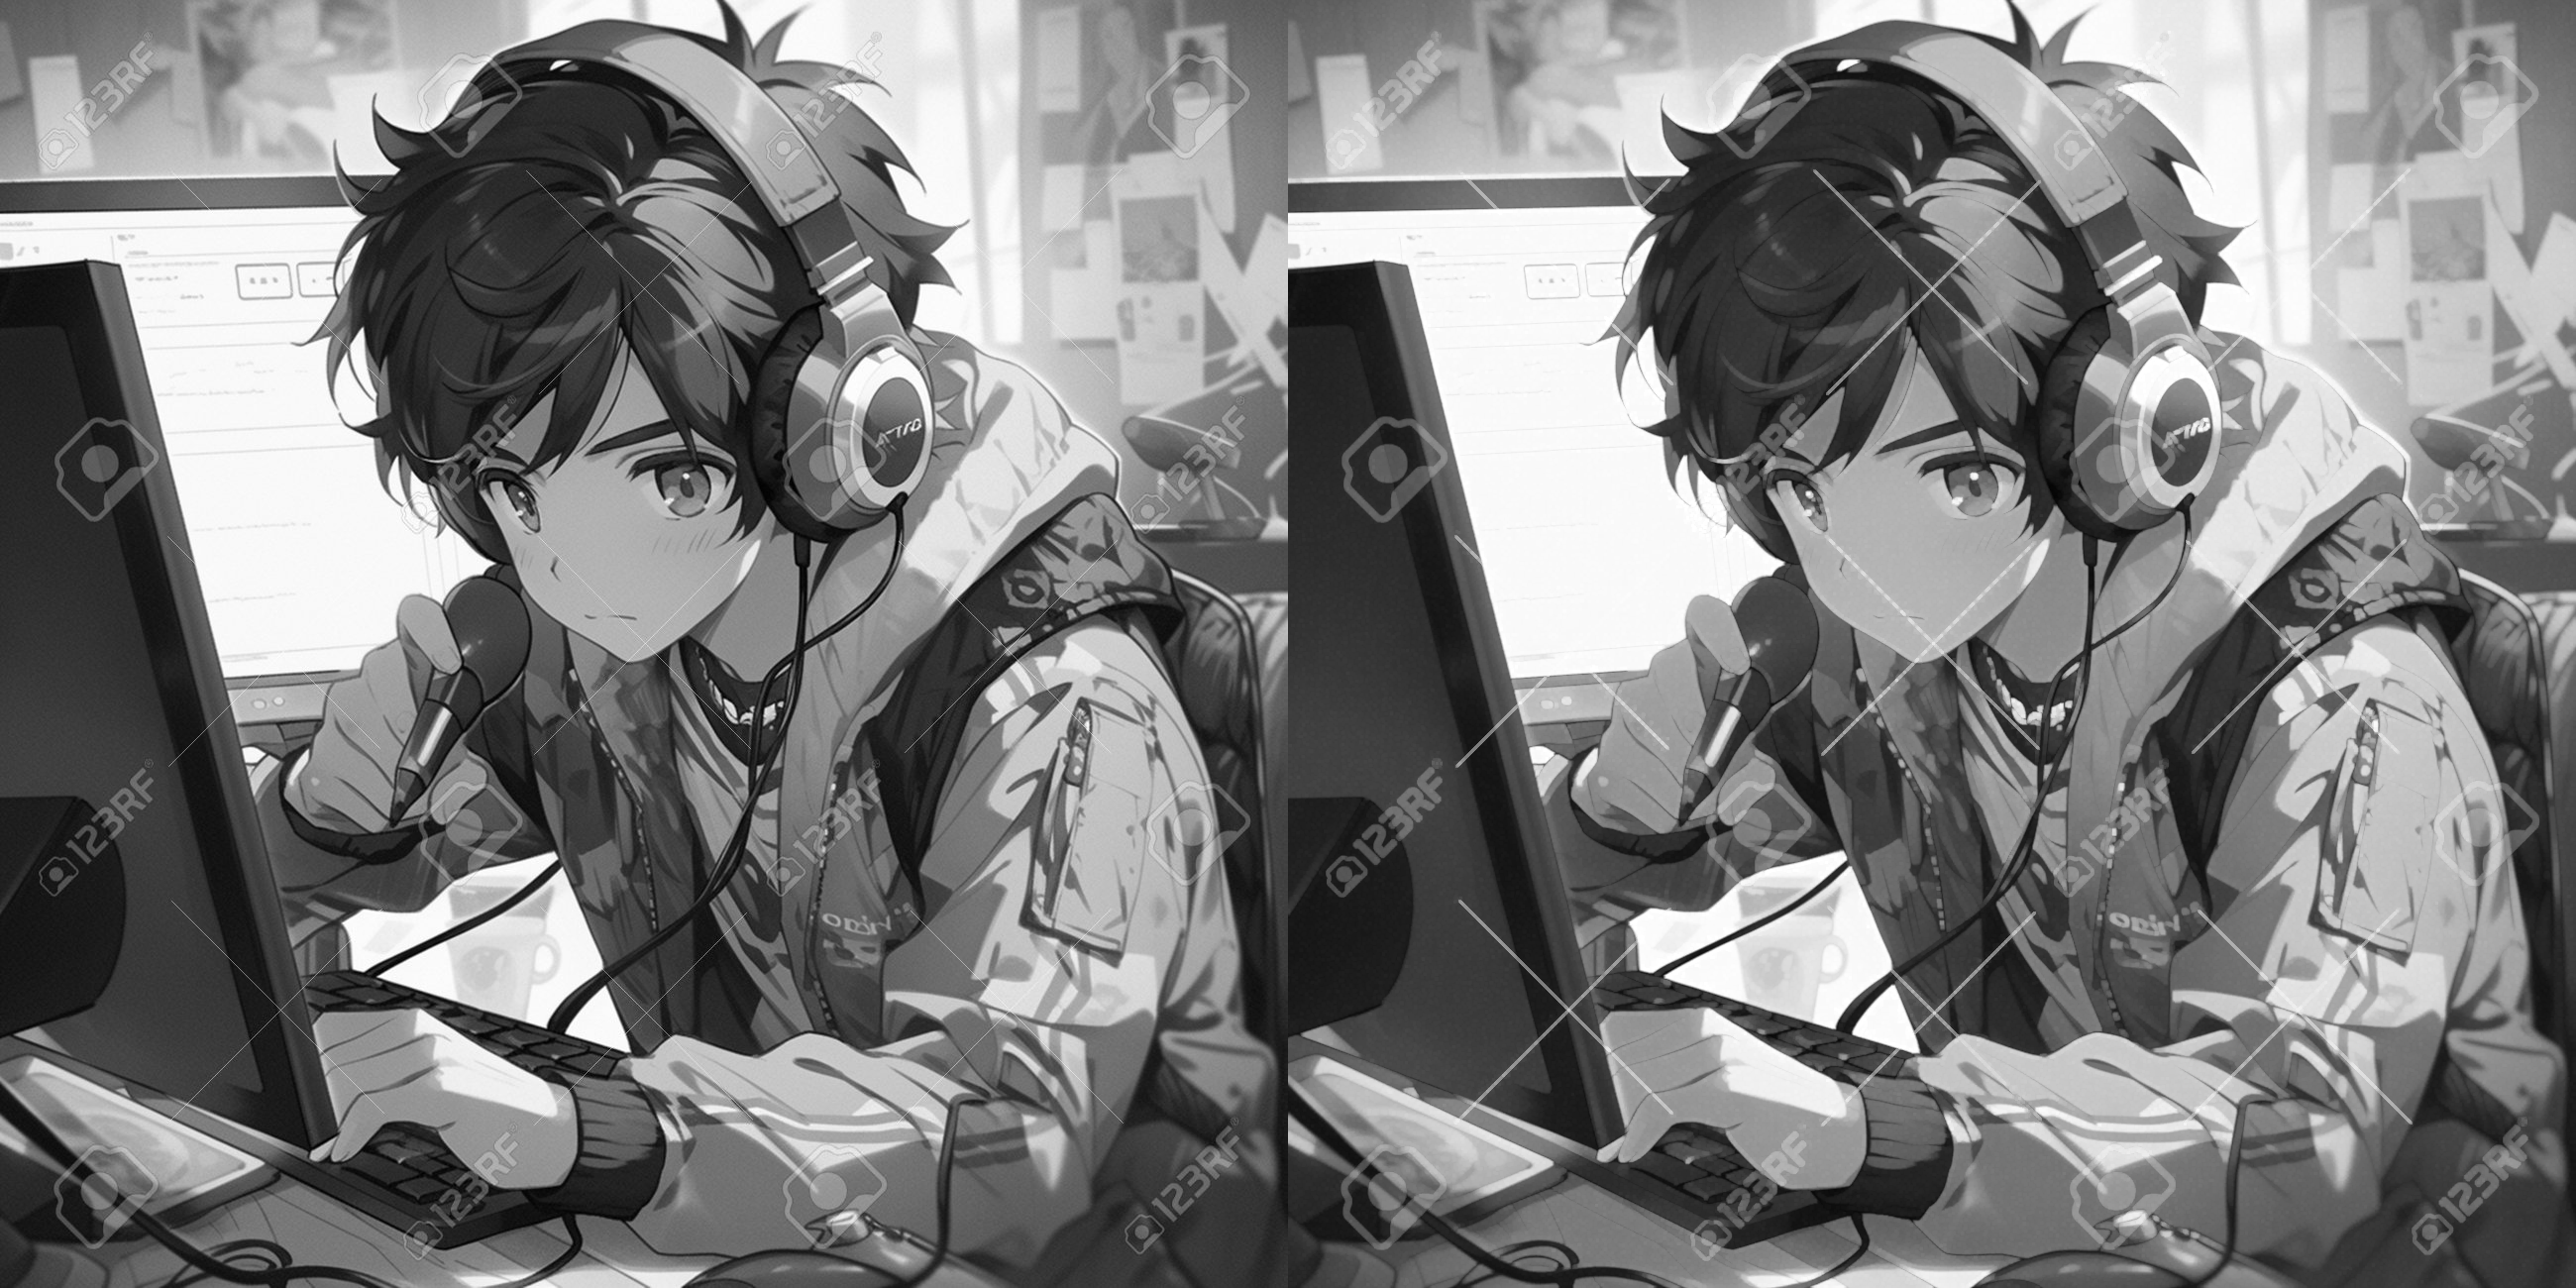

In [ ]:
# Load Image
def load_img(img_path):
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  return img

# Erosion operation
def erosion(img):
  kernel = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]])

  return cv2.erode(img, kernel, iterations=1)

# Dilation operation
def dilation(img):
  kernel = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]])

  return cv2.dilate(img, kernel, iterations=1)

# Morphological operation opening
def opening(img):
  kernel = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]])
  return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Morphological closing operation
def closing(img):
  kernel = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]])
  return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Display the images
def display(original, preprocess):
  show = np.concatenate((original, preprocess), axis=1)
  cv2_imshow(show)

upload = files.upload()
file_path = next(iter(upload))

# Load img
img = load_img(file_path)

# Choose the operation
choose = input("Enter the operation (erosion, dilation, opening, closing): ")
if choose == 'erosion':
  preprocess = erosion(img)
elif choose == 'dilation':
  preprocess = dilation(img)
elif choose == 'opening':
  preprocess = opening(img)
elif choose == 'closing':
  preprocess = closing(img)
else:
  print("Please enter a valid input.......")

# Display images
display(img, preprocess)
